In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append("../../")

from src.context_aware.config import DatasetConfig
from src.dataset_manager import DatasetConvertor 
from src.context_aware.preprocessing import PreparingDataset

========== Thumb ============
Backward: Compression rate: 0.3588
========== Index ============
Backward: Compression rate: 0.3281
========== Middle ============
Backward: Compression rate: 0.3398
thumb (104067,) (104067, 1) (104067,)
Name: thumb, Ts:0.01, Data length:104067, Dim of context:1, Compression rate:0.35880730683117606


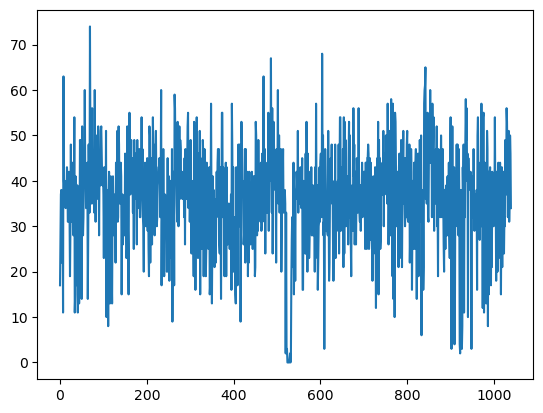

========== Thumb ============
Forward: Compression rate: 0.2231
========== Index ============
Forward: Compression rate: 0.2456
========== Middle ============
Forward: Compression rate: 0.2491
thumb (104067,) (104067, 3) (104067,)
Name: thumb, Ts:0.01, Data length:104067, Dim of context:3, Compression rate:0.22314470485360394


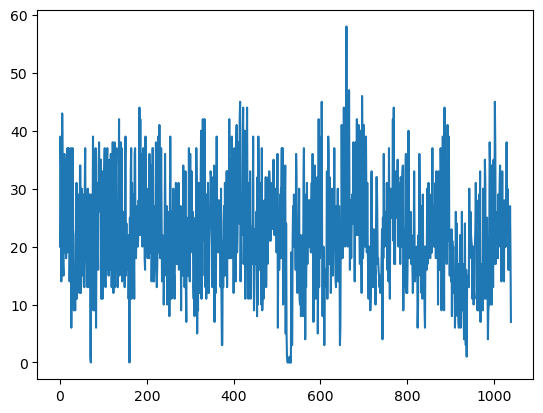

In [ ]:
rawDatasetFolder = "../../data/raw"
dpdrDatasetFolder = "../../data/processed/dpdr"
lenWindow = 100

mapping = {"forward": "fr", "backward": "bk"}
dpdr_params = [
    {"dbParameter": 0.1, "alpha": 0.01, "mode": "fixed"},
    {"dbParameter": 0.01, "alpha": 0.01, "mode": "fixed"}, 
]
for i, direction in enumerate(["backward", "forward"]):
    datasetConverter = DatasetConvertor(rawDatasetFolder)
    datasetConverter.processDataset(direction=direction, **dpdr_params[i])
    thumbDataUnit = datasetConverter.getDataUnit(f"thumb_{mapping[direction]}")
    thumbDataUnit.saveDataUnit(f"{dpdrDatasetFolder}/thumb_{direction}.csv")

    thumbDataUnit.display()
    trffic = thumbDataUnit.generateTrafficPattern(lenWindow)
    plt.plot(trffic.flatten())
    plt.show()

(104067, 3)
(104067, 3)
(104067,)
3


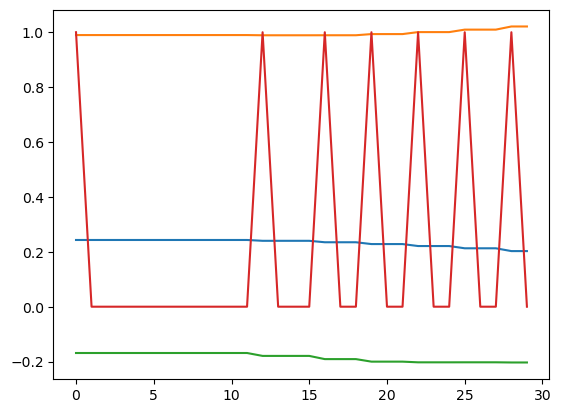

In [ ]:
print(thumbDataUnit.contextData.shape)
print(thumbDataUnit.contextDataDpDr.shape)
print(thumbDataUnit.timestamps.shape)
print(thumbDataUnit.dimFeatures)
plt.plot(thumbDataUnit.contextDataDpDr[0:30])
plt.plot(thumbDataUnit.transmitionFlags[0:30])